In [1]:
1+1

2

In [1]:
!pip install langgraph

  Using cached langgraph-0.4.8-py3-none-any.whl.metadata (6.8 kB)
  Using cached langchain_core-0.3.66-py3-none-any.whl.metadata (5.8 kB)
  Using cached langgraph_checkpoint-2.1.0-py3-none-any.whl.metadata (4.2 kB)
  Using cached langgraph_prebuilt-0.2.2-py3-none-any.whl.metadata (4.5 kB)
  Using cached langgraph_sdk-0.1.70-py3-none-any.whl.metadata (1.5 kB)
  Using cached xxhash-3.5.0-cp311-cp311-win_amd64.whl.metadata (13 kB)
  Using cached langsmith-0.4.1-py3-none-any.whl.metadata (15 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached jsonpatch-1.33-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached ormsgpack-1.10.0-cp311-cp311-win_amd64.whl.metadata (44 kB)
  Using cached orjson-3.10.18-cp311-cp311-win_amd64.whl.metadata (43 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
  Using cached zstandard-0.23.0-cp311-cp311-win_amd64.whl.metadata (3.0 kB)
Using cached langgraph-0.4.8-py3-none-any.whl (152 kB)
Using cached 

basic chatbot using langgraph(GRAPH AI{})

In [1]:
from typing import Annotated

from typing_extensions import TypedDict


from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages #(its a reducer)adds into states list

In [2]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages:Annotated[list,add_messages]

graphbuilder=StateGraph(State)


In [6]:
graphbuilder

In [7]:
!pip install python-dotenv


In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [7]:
!pip install langchain_groq


   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   ---------------------------------------- 0/2 [groq]
   -------------------- ------------------- 1/2 [langchain_groq]
   ---------------------------------------- 2/2 [langchain_groq]



In [9]:
!pip install langchain

  Using cached langchain-0.3.26-py3-none-any.whl.metadata (7.8 kB)
  Using cached langchain_text_splitters-0.3.8-py3-none-any.whl.metadata (1.9 kB)
  Using cached sqlalchemy-2.0.41-cp311-cp311-win_amd64.whl.metadata (9.8 kB)
  Using cached greenlet-3.2.3-cp311-cp311-win_amd64.whl.metadata (4.2 kB)
Using cached langchain-0.3.26-py3-none-any.whl (1.0 MB)
Using cached langchain_text_splitters-0.3.8-py3-none-any.whl (32 kB)
Using cached sqlalchemy-2.0.41-cp311-cp311-win_amd64.whl (2.1 MB)
Using cached greenlet-3.2.3-cp311-cp311-win_amd64.whl (297 kB)

   ---------------------------------------- 0/4 [greenlet]
   ---------------------------------------- 0/4 [greenlet]
   ---------------------------------------- 0/4 [greenlet]
   ---------- ----------------------------- 1/4 [SQLAlchemy]
   ---------- ----------------------------- 1/4 [SQLAlchemy]
   ---------- ----------------------------- 1/4 [SQLAlchemy]
   ---------- ----------------------------- 1/4 [SQLAlchemy]
   ---------- -----------

In [4]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm=ChatGroq(model="llama3-8b-8192")

In [10]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000025E72016E50>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000025E721D1850>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

***llm is ready...now we have to build chatbot node and start,end and the respective edges***


In [13]:
## Node Functionality
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [14]:
graph_builder=StateGraph(State)

## Adding node
graph_builder.add_node("llmchatbot",chatbot)
## Adding Edges
graph_builder.add_edge(START,"llmchatbot")
graph_builder.add_edge("llmchatbot",END)

## compile the graph
graph=graph_builder.compile()

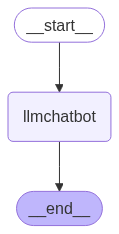

In [15]:
## Visualize the graph
from IPython.display import Image,display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [16]:
response=graph.invoke({"messages":"Hi"})

In [17]:
response

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='cc757084-83fe-4bee-8abe-b9103b9c2a31'),
  AIMessage(content="Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 11, 'total_tokens': 36, 'completion_time': 0.026861817, 'prompt_time': 0.002622101, 'queue_time': 0.274707979, 'total_time': 0.029483918}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None}, id='run--c087e88d-7dab-45c2-911c-89c1fba35929-0', usage_metadata={'input_tokens': 11, 'output_tokens': 25, 'total_tokens': 36})]}

In [19]:
response["messages"][-1].content

"Hi! It's nice to meet you. Is there something I can help you with or would you like to chat?"

In [ ]:
res=graph.stream({"messages":"where is hyd?"})
res #iterable

<generator object Pregel.stream at 0x0000026C54D4ED40>

In [36]:
for event in graph.stream({"messages":"provide recent ai news in 2025"}):
    
    for value in event.values():
        print(value["messages"][0].content)

Here are some recent AI news updates for 2025:

**January 2025**

* **Google's AI-powered Chatbot, LaMDA, Gets Human-like Conversational Skills**: Google announces that its LaMDA (Large Language Model Dialogue Application) chatbot has achieved human-like conversational abilities, allowing it to engage in coherent and context-dependent conversations with users. (Source: The Verge)
* **Meta Unveils AI-Powered Virtual Assistant for Smart Homes**: Meta announces the release of its AI-powered virtual assistant, called "Echo," designed to control and manage smart home devices, allowing users to automate tasks and receive personalized recommendations. (Source: CNET)

**February 2025**

* **Facebook's AI-Powered Facial Recognition System Accurately Identifies Faces**: Researchers at Facebook announce that their AI-powered facial recognition system, called "DeepFace," has achieved an accuracy rate of 99.7% in identifying faces, surpassing human-level performance. (Source: TechCrunch)
* **Micros

***chatbot with tools***

In [37]:
!pip install langchain_tavily

  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   --------- ------------------------------ 2.4/9.5 MB 13.4 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.5 MB 11.9 MB/s eta 0:00:01
   ---------------------- ----------------- 5.2/9.5 MB 11.4 MB/s eta 0:00:01
   ------------------------- -------------- 6.0/9.5 MB 7.2 MB/s eta 0:00:01
   ----------------------------- ---------- 7.1/9.5 MB 6.6 MB/s eta 0:00:01
   ---------------------------------- ----- 8.1/9.5 MB 6.6 MB/s eta 0:00:01
   -------------------------------------- - 9.2/9.5 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 6.1 MB/s eta 0:00:00
Using cached requests-2.32.4-py3-none-any.whl (64 kB)

  Attempting uninstall: requests

    Found existing installation: requests 2.31.0

    Uninstalling requests-2.31.0:

      Successfully uninstalled requests-2.31.0

   -----------------------------

In [ ]:
from langchain_tavily import TavilySearch
#travility tool
tool=TavilySearch(max_results=2)
tool.invoke("What is langgraph")

{'query': 'What is langgraph',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'What is LangGraph? - IBM',
   'url': 'https://www.ibm.com/think/topics/langgraph',
   'content': 'LangGraph, created by LangChain, is an open source AI agent framework designed to build, deploy and manage complex generative AI agent workflows. At its core, LangGraph uses the power of graph-based architectures to model and manage the intricate relationships between various components of an AI agent workflow. LangGraph illuminates the processes within an AI workflow, allowing full transparency of the agent’s state. By combining these technologies with a set of APIs and tools, LangGraph provides users with a versatile platform for developing AI solutions and workflows including chatbots, state graphs and other agent-based systems. Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. LangGraph uses enhanced decision-making by modeling c

In [7]:
#multiplication tool
def multiply(a:int,b:int)->int:
    """Multiply a and b

    Args:
        a (int): first int
        b (int): second int

    Returns:
        int: output int
    """
    return a*b

binding tools with llm 

In [8]:
tools=[tool,multiply] #tools are ready...travily and multiply
llm_with_tool=llm.bind_tools(tools) #binding tools with llm
llm_with_tool

RunnableBinding(bound=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000002B8521C8110>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000002B8520F9E10>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'tavily_search', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. It not only retrieves URLs and snippets, but offers advanced search depths, domain management, time range filters, and image search, this tool delivers real-time, accurate, and citation-backed results.Input should be a search query.', 'parameters': {'properties': {'query': {'description': 'Search query to look up', 'type': 'string'}, 'include_domains': {'anyOf': [{'items': {'type': 'string'}, 'type': 'array'}, {'type': 'null'}], 'default': [], 'description': 'A list 

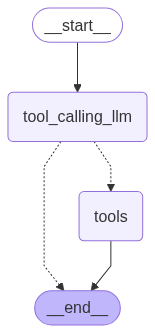

In [9]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools",END)

## compile the graph
graph=builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [14]:
response=graph.invoke({"messages":"What is the recent ai news"})

In [15]:
response["messages"]

[HumanMessage(content='What is the recent ai news', additional_kwargs={}, response_metadata={}, id='7a490cf6-fe8c-4660-baa1-d4fd1a3785f8'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ny9c00ysb', 'function': {'arguments': '{"query":"recent ai news","search_depth":"advanced","time_range":"week","topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 2194, 'total_tokens': 2287, 'completion_time': 0.120376943, 'prompt_time': 0.24318836, 'queue_time': 0.26941920900000005, 'total_time': 0.363565303}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8af39bf2ae', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b0c2f2a1-1a4e-4a08-ba5d-ad3e95427255-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'recent ai news', 'search_depth': 'advanced', 'time_range': 'week', 'topic': 'news'}, 'id': 'ny9c00ysb', 'type': 'tool_call'}], usage_metadata={'input_tokens': 219

AS WE CAN SEE THERE IS NO AI MESSAGE(RESPONSE FROM LLM)...INSTEAD THERE SI A TOOL MESSAGE(TOOL CALL TO TRAVILY IS HAPPEDENED)...llm with binding tools returns tool calls(llm.bind_tools())

In [22]:
response["messages"][-1].content

'{"query": "recent ai news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.csoonline.com/article/4008912/wormgpt-returns-new-malicious-ai-variants-built-on-grok-and-mixtral-uncovered.html", "title": "WormGPT returns: New malicious AI variants built on Grok and Mixtral uncovered - csoonline.com", "score": 0.70214266, "published_date": "Wed, 18 Jun 2025 12:17:59 GMT", "content": "news ### New npm threats can erase production systems with a single request Jun 10, 2025 3 mins\\n   news ### Chrome extension privacy promises undone by hardcoded secrets, leaky HTTP Jun 9, 2025 4 mins\\n   news ### New phishing campaign hijacks clipboard via fake CAPTCHA for malware delivery Jun 6, 2025 4 mins\\n   news ### Supply chain attack hits RubyGems to steal Telegram API data Jun 5, 2025 4 mins [...] Related content\\n---------------\\n\\nOpinion ### Security, risk and compliance in the world of AI agents By Nikhil Sarnot Jun 17, 2025 12 mins Artificial Int

In [ ]:
response=graph.invoke({"messages":"2 multiply by 5"}) #tool call to multiply function

In [24]:
response["messages"]

[HumanMessage(content='2 multiply by 5', additional_kwargs={}, response_metadata={}, id='70af6c44-3cec-4063-8f27-9c04792160e7'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'cnp7f1rv7', 'function': {'arguments': '{"a":2,"b":5}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 2193, 'total_tokens': 2265, 'completion_time': 0.078790695, 'prompt_time': 0.242451688, 'queue_time': 0.273387411, 'total_time': 0.321242383}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--e0758406-00d4-4a6c-b1b1-ca0960f27e00-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 5}, 'id': 'cnp7f1rv7', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2193, 'output_tokens': 72, 'total_tokens': 2265}),
 ToolMessage(content='10', name='multiply', id='ae115e13-651b-401b-abe8-a96c7d1b1bb8', tool_call_id='cnp7f1rv7')]

In [11]:
response=graph.invoke({"messages":"define langgraph"}) 

In [ ]:
response["messages"] #no tool call

[HumanMessage(content='define langgraph', additional_kwargs={}, response_metadata={}, id='96671844-873f-4c46-bbf3-0e5023c19fe7'),
 AIMessage(content='I understand that you\'re asking me to define "langgraph". However, I don\'t have any information about what "langgraph" means or what it represents. Could you please provide more context or clarify what you mean by "langgraph"? This will help me better understand your question and provide a more accurate response.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 65, 'prompt_tokens': 2191, 'total_tokens': 2256, 'completion_time': 0.089202153, 'prompt_time': 0.243193802, 'queue_time': 0.272140528, 'total_time': 0.332395955}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8af39bf2ae', 'finish_reason': 'stop', 'logprobs': None}, id='run--3a603ae4-f91a-4487-9678-020322da3f45-0', usage_metadata={'input_tokens': 2191, 'output_tokens': 65, 'total_tokens': 2256})]

In [14]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

define langgraph
================================== Ai Message ==================================

Based on the provided tool definitions, I will define the "langgraph" tool.

```json
{
    "type": "function",
    "function": {
        "name": "langgraph",
        "description": "Generate a language graph for a given text or query.",
        "parameters": {
            "properties": {
                "text": {
                    "description": "The text or query to generate a language graph for.",
                    "type": "string"
                }
            },
            "required": [
                "text"
            ],
            "type": "object"
        }
    }
}
```

This tool takes a text or query as input and generates a language graph.


In [15]:
response=graph.invoke({"messages":"what is 5 multiplied by 2 and then multiplied by 10"}) 

In [16]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

what is 5 multiplied by 2 and then multiplied by 10
================================== Ai Message ==================================
Tool Calls:
  multiply (k8x7y3afn)
 Call ID: k8x7y3afn
  Args:
    a: 5
    b: 2
  multiply (85qxexgyz)
 Call ID: 85qxexgyz
  Args:
    a: 10
    b: 20
================================= Tool Message =================================
Name: multiply

10
================================= Tool Message =================================
Name: multiply

200


In [17]:
response=graph.invoke({"messages":"what is 5 multiplied by 2 and then multiplied by 10 and then give recent ai news"}) 

In [18]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

what is 5 multiplied by 2 and then multiplied by 10 and then give recent ai news
================================== Ai Message ==================================
Tool Calls:
  multiply (58aa1tzrw)
 Call ID: 58aa1tzrw
  Args:
    a: 5
    b: 2
  multiply (ggx5jbga3)
 Call ID: ggx5jbga3
  Args:
    a: 10
    b: 20
  tavily_search (1mex1k3gs)
 Call ID: 1mex1k3gs
  Args:
    query: recent ai news
================================= Tool Message =================================
Name: multiply

10
================================= Tool Message =================================
Name: multiply

200
================================= Tool Message =================================
Name: tavily_search

{"query": "recent ai news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "AI News | Latest Headlines and Developments | Reuters", "url": "https://www.reuters.com/technology/artificial

***ReACT agent Architecture***

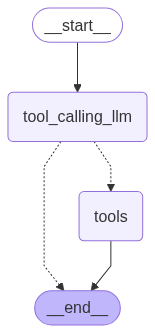

In [28]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
# builder.add_edge("tools","tool_calling_llm")
builder.add_edge("tools",END)

## compile the graph
graph=builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [29]:
response=graph.invoke({"messages":"give recent ai news and then multiply 5 by 2"}) 

In [31]:
response["messages"]

[HumanMessage(content='give recent ai news and then multiply 5 by 2', additional_kwargs={}, response_metadata={}, id='77fa1f2a-2dcd-4f8a-9ebc-ecb522d9d2a6'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '9g8nyhvdw', 'function': {'arguments': '{"query":"recent ai news","search_depth":"advanced","time_range":"day","topic":"news"}', 'name': 'tavily_search'}, 'type': 'function'}, {'id': 'dfxg5xwhy', 'function': {'arguments': '{"a":5,"b":2}', 'name': 'multiply'}, 'type': 'function'}, {'id': '766grg5c6', 'function': {'arguments': '{"a":5,"b":2}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 223, 'prompt_tokens': 2200, 'total_tokens': 2423, 'completion_time': 0.246531115, 'prompt_time': 0.243920185, 'queue_time': 0.27516355299999995, 'total_time': 0.4904513}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--95b8074c-395e-4b99-89aa-555ee06de

In [32]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

give recent ai news and then multiply 5 by 2
================================== Ai Message ==================================
Tool Calls:
  tavily_search (9g8nyhvdw)
 Call ID: 9g8nyhvdw
  Args:
    query: recent ai news
    search_depth: advanced
    time_range: day
    topic: news
  multiply (dfxg5xwhy)
 Call ID: dfxg5xwhy
  Args:
    a: 5
    b: 2
  multiply (766grg5c6)
 Call ID: 766grg5c6
  Args:
    a: 5
    b: 2
================================= Tool Message =================================
Name: tavily_search

{"query": "recent ai news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://glassalmanac.com/ibm-laid-off-8000-employees-to-replace-them-with-ai-what-they-didnt-expect-was-having-to-rehire-as-many-due-to-ai/", "title": "IBM laid off 8,000 employees to replace them with AI—what they didn’t expect was having to rehire as many due to AI - Glass Almanac", "

ai : llm----->tavily---->end
mult : llm------>multiplication tool--->end


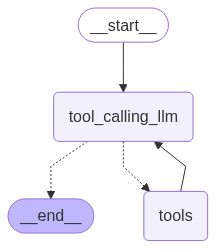

In [40]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools","tool_calling_llm")
# builder.add_edge("tools",END)

## compile the graph
graph=builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [41]:
response=graph.invoke({"messages":"give recent ai news and then multiply 5 by 2"}) 

In [42]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

give recent ai news and then multiply 5 by 2
================================== Ai Message ==================================
Tool Calls:
  tavily_search (xnapbn54s)
 Call ID: xnapbn54s
  Args:
    query: AI news
    search_depth: advanced
    time_range: week
  multiply (5aex9b4dg)
 Call ID: 5aex9b4dg
  Args:
    a: 5
    b: 2
  multiply (npqqa1eby)
 Call ID: npqqa1eby
  Args:
    a: 5
    b: 2
================================= Tool Message =================================
Name: tavily_search

{"query": "AI news", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.artificialintelligence-news.com/", "title": "AI News | Latest AI News, Analysis & Events", "content": "Accept Deny View preferences Save preferences[View preferences](https://www.artificialintelligence-news.com/cookie-policy-uk/#cmplz-manage-consent-container)\n\n[Cookie Policy](https://www.artificialin

ai  : llm---->tool---->llm,
mult : llm---->tool----->llm

***ADDING MEMORY IN LangGraph***

In [43]:
response=graph.invoke({"messages":"My name is Akshay"}) 
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

My name is Akshay
================================== Ai Message ==================================

Nice to meet you, Akshay! I'm here to help you with any questions or tasks you may have. Please feel free to ask me anything or provide some input, and I'll do my best to assist you.


In [44]:
response=graph.invoke({"messages":"What is my name?"}) 
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is my name?
================================== Ai Message ==================================

I'm happy to help you with that!

To provide a helpful response, I would like to clarify that you haven't provided any specific information about yourself that would allow me to identify your name. Could you please provide more context or details about your question?

If you're asking about your name in a different context, please let me know and I'll do my best to assist you.

Here's a possible response:

"I'm happy to help you with that! However, I don't have any information about your name. Could you please provide more context or details about your question?"


adding memory

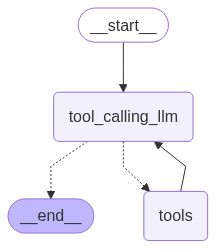

In [52]:
## Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.checkpoint.memory import MemorySaver

memory=MemorySaver()
## Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## Grpah
builder=StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools","tool_calling_llm")
# builder.add_edge("tools",END)

## compile the graph
graph=builder.compile(checkpointer=memory)  #adding memory

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [53]:
config={"configurable":{"thread_id":"1"}}
response=graph.invoke({"messages":"My name is Akshay"},config=config)
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

My name is Akshay
================================== Ai Message ==================================

Nice to meet you, Akshay!


In [54]:
response=graph.invoke({"messages":"What is my name"},config=config)
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

My name is Akshay
================================== Ai Message ==================================

Nice to meet you, Akshay!
================================ Human Message =================================

What is my name
================================== Ai Message ==================================
Tool Calls:
  tavily_search (5xtp40qw9)
 Call ID: 5xtp40qw9
  Args:
    query: What is my name
================================= Tool Message =================================
Name: tavily_search

{"query": "What is my name", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "What Does My Name Mean? The Meaning Of Names", "url": "https://www.names.org/", "content": "Names.org is a website that helps you discover the meaning, origin, popularity, and trends of your name. You can search by first name, last name, full name, or baby name, and explore various lists and categories o

In [55]:
response["messages"][-1].content

'Your name is Akshay!'

***Streaming***

In [57]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()

In [62]:
def superbot(state:State):
    return {"messages",{llm.invoke(state["messages"])}}

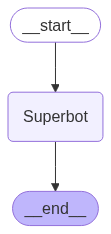

In [63]:
graph=StateGraph(State)
graph.add_node("Superbot",superbot)
graph.add_edge(START,"Superbot")
graph.add_edge("Superbot",END)

graph_builder=graph.compile(checkpointer=memory)
## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [ ]:
config={"configurable":{"thread_id":"1"}}
response=graph_builder.invoke({"messages":"hi,My name is Akshay and i like cricket"},config=config)


In [66]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Krish And I like cricket"},config,stream_mode="updates"):
    print(chunk)

TypeError: unhashable type: 'AIMessage'